In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time library and the datetime module from the datetime library 
import time 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Unpack lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. 
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print (coordinates)

[(-68.52886712712652, 56.98803332460048), (12.660298765451756, -175.7717929679077), (18.922820665011187, 72.63531112775306), (68.61368666220758, -132.0797124515545), (49.111691249668525, 53.68292654595314), (79.04656094609487, -160.89457092211748), (9.962283846281792, -133.48464259572646), (58.45866377978356, 45.32426924562009), (-18.619674526346486, -21.67745461035372), (-50.45752422256232, 166.9663084484372), (-60.593135308164904, 70.84239656395243), (1.990286689521426, -156.27015124464072), (-39.26493135630163, -24.83948578622835), (54.238169973172916, -175.21661710209418), (9.079347911639758, 21.556039974466074), (79.91300072403885, 15.640539506277037), (80.55694722736567, 91.79122921316485), (0.13058992626157817, -46.59261676557833), (-35.50161461477957, -134.8587528650806), (80.61759944038371, 46.37572202181883), (-32.799915299981095, -34.442319815925885), (-7.86557071016729, 164.4126814273402), (-1.4964638346910988, -112.9496834571479), (5.98518154407985, -117.5196544744224), (-

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [5]:
# Build the basic URL for the OpenWeatherMap with my weather_api_key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1  
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 13 | kapaa
Processing Record 3 of Set 13 | bombay
Processing Record 4 of Set 13 | tuktoyaktuk
Processing Record 5 of Set 13 | makat
Processing Record 6 of Set 13 | barrow
Processing Record 7 of Set 13 | atuona
Processing Record 8 of Set 13 | vetluzhskiy
Processing Record 9 of Set 13 | georgetown
Processing Record 10 of Set 13 | bluff
Processing Record 11 of Set 13 | saint-philippe
Processing Record 12 of Set 13 | hilo
Processing Record 13 of Set 13 | arraial do cabo
Processing Record 14 of Set 13 | provideniya
Processing Record 15 of Set 13 | ndele
Processing Record 16 of Set 13 | longyearbyen
Processing Record 17 of Set 13 | talnakh
Processing Record 18 of Set 13 | salinopolis
Processing Record 19 of Set 13 | rikitea
Processing Record 20 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 13 | lata
Processing Record 22 of Set 13 | lazaro cardenas
Processing Re

Processing Record 34 of Set 16 | baracoa
Processing Record 35 of Set 16 | solnechnyy
Processing Record 36 of Set 16 | bethel
Processing Record 37 of Set 16 | balod
Processing Record 38 of Set 16 | dakar
Processing Record 39 of Set 16 | bacungan
Processing Record 40 of Set 16 | bodden town
Processing Record 41 of Set 16 | nizhyn
Processing Record 42 of Set 16 | srednekolymsk
Processing Record 43 of Set 16 | anadyr
Processing Record 44 of Set 16 | requena
Processing Record 45 of Set 16 | verkhniy uslon
Processing Record 46 of Set 16 | mugur-aksy
Processing Record 47 of Set 16 | artigas
Processing Record 48 of Set 16 | navahrudak
Processing Record 49 of Set 16 | okato
Processing Record 50 of Set 16 | esil
Processing Record 1 of Set 17 | liuhe
Processing Record 2 of Set 17 | east london
Processing Record 3 of Set 17 | morondava
Processing Record 4 of Set 17 | malibu
Processing Record 5 of Set 17 | port hedland
Processing Record 6 of Set 17 | ornskoldsvik
Processing Record 7 of Set 17 | sta

Processing Record 23 of Set 20 | camana
Processing Record 24 of Set 20 | pingliang
Processing Record 25 of Set 20 | mutsamudu
City not found. Skipping...
Processing Record 26 of Set 20 | aklavik
Processing Record 27 of Set 20 | celestun
Processing Record 28 of Set 20 | westlock
Processing Record 29 of Set 20 | evensk
Processing Record 30 of Set 20 | gorontalo
Processing Record 31 of Set 20 | baykit
Processing Record 32 of Set 20 | canavieiras
Processing Record 33 of Set 20 | bela
Processing Record 34 of Set 20 | muskogee
Processing Record 35 of Set 20 | lichuan
Processing Record 36 of Set 20 | pacific grove
Processing Record 37 of Set 20 | ilulissat
Processing Record 38 of Set 20 | kampene
Processing Record 39 of Set 20 | avera
Processing Record 40 of Set 20 | havre-saint-pierre
Processing Record 41 of Set 20 | shenjiamen
Processing Record 42 of Set 20 | saint anthony
Processing Record 43 of Set 20 | bafq
Processing Record 44 of Set 20 | madison
Processing Record 45 of Set 20 | innisfa

Processing Record 12 of Set 24 | olyka
Processing Record 13 of Set 24 | gerash
Processing Record 14 of Set 24 | los llanos de aridane
Processing Record 15 of Set 24 | high level
Processing Record 16 of Set 24 | kudahuvadhoo
Processing Record 17 of Set 24 | rosetta
Processing Record 18 of Set 24 | umm kaddadah
Processing Record 19 of Set 24 | turmalina
Processing Record 20 of Set 24 | bandar
Processing Record 21 of Set 24 | syracuse
Processing Record 22 of Set 24 | bilma
Processing Record 23 of Set 24 | clarence town
Processing Record 24 of Set 24 | san miguel
Processing Record 25 of Set 24 | zatoka
Processing Record 26 of Set 24 | mnogovershinnyy
Processing Record 27 of Set 24 | pechenga
Processing Record 28 of Set 24 | kibala
Processing Record 29 of Set 24 | knysna
Processing Record 30 of Set 24 | skibbereen
Processing Record 31 of Set 24 | trairi
Processing Record 32 of Set 24 | nigde
Processing Record 33 of Set 24 | port-gentil
Processing Record 34 of Set 24 | oga
Processing Record 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,78.78,64,40,1.99,US,2022-01-25 01:08:37
1,Bombay,19.0144,72.8479,62.58,51,20,0.00,IN,2022-01-25 01:08:29
2,Tuktoyaktuk,69.4541,-133.0374,23.45,87,100,17.31,CA,2022-01-25 01:12:04
3,Makat,47.6469,53.3463,17.40,91,100,15.26,KZ,2022-01-25 01:12:04
4,Barrow,71.2906,-156.7887,12.22,79,100,17.27,US,2022-01-25 01:04:15
5,Atuona,-9.8000,-139.0333,78.78,73,25,17.65,PF,2022-01-25 01:07:27
6,Vetluzhskiy,58.3902,45.4654,7.59,96,96,6.76,RU,2022-01-25 01:12:05
7,Georgetown,5.4112,100.3354,80.53,83,20,0.00,MY,2022-01-25 01:08:28
8,Bluff,-46.6000,168.3333,60.80,74,100,14.47,NZ,2022-01-25 01:05:36
9,Saint-Philippe,-21.3585,55.7679,76.59,69,55,14.99,RE,2022-01-25 01:08:38


In [12]:
# Reorder the Columns of the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-01-25 01:08:37,22.0752,-159.3190,78.78,64,40,1.99
1,Bombay,IN,2022-01-25 01:08:29,19.0144,72.8479,62.58,51,20,0.00
2,Tuktoyaktuk,CA,2022-01-25 01:12:04,69.4541,-133.0374,23.45,87,100,17.31
3,Makat,KZ,2022-01-25 01:12:04,47.6469,53.3463,17.40,91,100,15.26
4,Barrow,US,2022-01-25 01:04:15,71.2906,-156.7887,12.22,79,100,17.27
5,Atuona,PF,2022-01-25 01:07:27,-9.8000,-139.0333,78.78,73,25,17.65
6,Vetluzhskiy,RU,2022-01-25 01:12:05,58.3902,45.4654,7.59,96,96,6.76
7,Georgetown,MY,2022-01-25 01:08:28,5.4112,100.3354,80.53,83,20,0.00
8,Bluff,NZ,2022-01-25 01:05:36,-46.6000,168.3333,60.80,74,100,14.47
9,Saint-Philippe,RE,2022-01-25 01:08:38,-21.3585,55.7679,76.59,69,55,14.99


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
#Plot Weather Data

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643075866.4744759

In [16]:
# Use string format method to reformat the datetime stamp.
today = time.strftime("%x")
today

'01/24/22'

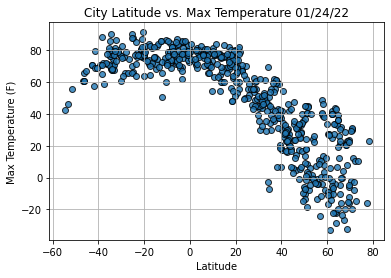

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

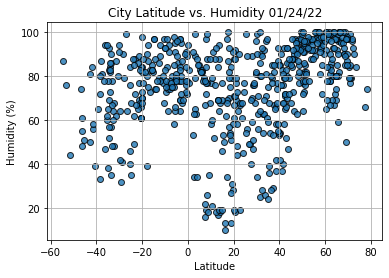

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

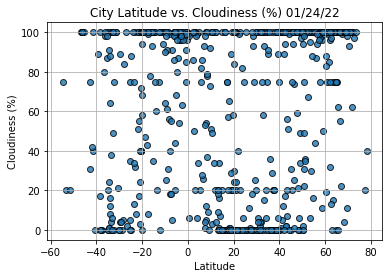

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

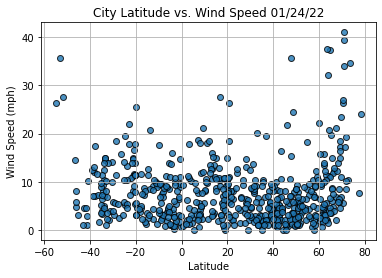

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [ ]:
#Determine Correlations

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create a new DataFrame from the current DataFrame 
# Use loc method to get a specific row from a current DataFrame 
index13 = city_data_df.loc[13]
index13

City                        Ndele
Country                        CF
Date          2022-01-25 01:12:05
Lat                        8.4109
Lng                       20.6473
Max Temp                    70.23
Humidity                       26
Cloudiness                     78
Wind Speed                   4.76
Name: 13, dtype: object

In [23]:
# Filter the DF for all Northern Hemisphere latitudes >= 0
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
584    False
585     True
586    False
587     True
588    False
Name: Lat, Length: 589, dtype: bool

In [24]:
# Create a DF with all data fitting the criteria from above, for latitudes greater than or equal to 0, using the loc method
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-01-25 01:08:37,22.0752,-159.3190,78.78,64,40,1.99
1,Bombay,IN,2022-01-25 01:08:29,19.0144,72.8479,62.58,51,20,0.00
2,Tuktoyaktuk,CA,2022-01-25 01:12:04,69.4541,-133.0374,23.45,87,100,17.31
3,Makat,KZ,2022-01-25 01:12:04,47.6469,53.3463,17.40,91,100,15.26
4,Barrow,US,2022-01-25 01:04:15,71.2906,-156.7887,12.22,79,100,17.27


In [25]:
# Create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-01-25 01:08:37,22.0752,-159.3190,78.78,64,40,1.99
1,Bombay,IN,2022-01-25 01:08:29,19.0144,72.8479,62.58,51,20,0.00
2,Tuktoyaktuk,CA,2022-01-25 01:12:04,69.4541,-133.0374,23.45,87,100,17.31
3,Makat,KZ,2022-01-25 01:12:04,47.6469,53.3463,17.40,91,100,15.26
4,Barrow,US,2022-01-25 01:04:15,71.2906,-156.7887,12.22,79,100,17.27


In [26]:
# Create Southern Hemisphere DataFrame
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Atuona,PF,2022-01-25 01:07:27,-9.8000,-139.0333,78.78,73,25,17.65
8,Bluff,NZ,2022-01-25 01:05:36,-46.6000,168.3333,60.80,74,100,14.47
9,Saint-Philippe,RE,2022-01-25 01:08:38,-21.3585,55.7679,76.59,69,55,14.99
11,Arraial Do Cabo,BR,2022-01-25 01:11:40,-22.9661,-42.0278,75.90,88,32,22.01
16,Salinopolis,BR,2022-01-25 01:12:06,-0.6136,-47.3561,78.19,78,100,8.81


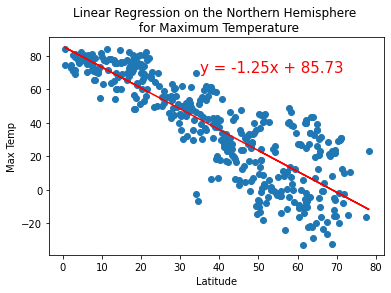

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(35,70))

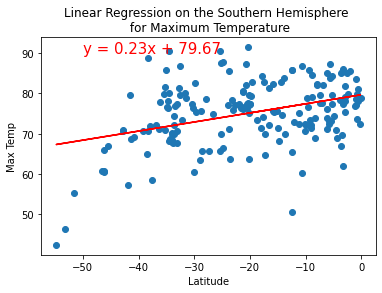

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

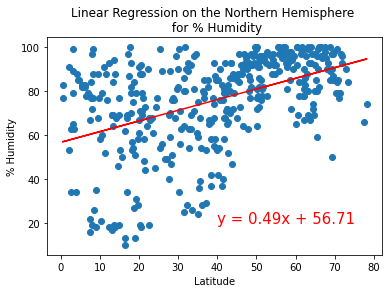

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

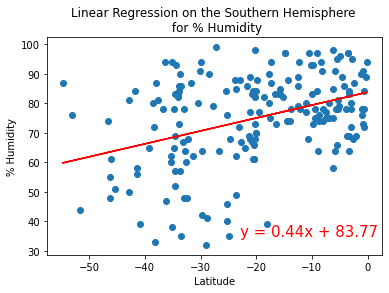

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-23,35))

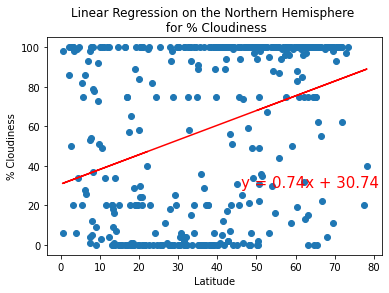

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(46,29))

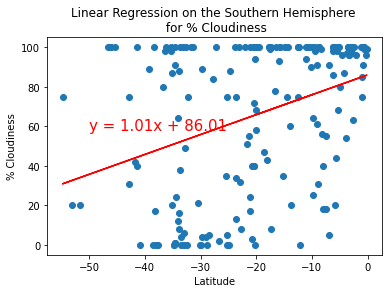

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,58))

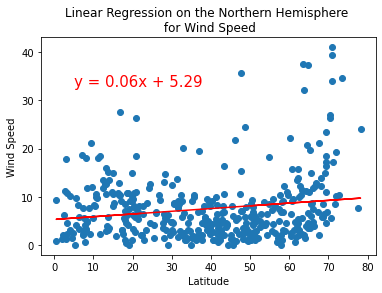

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,33))

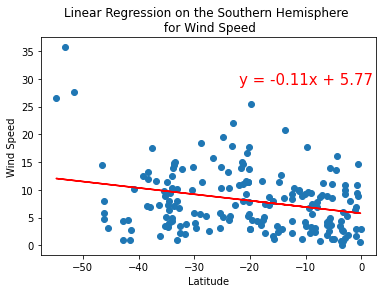

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-22,29))